# 简单线性回归

## 0. 加载相关模块

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gradient_descent_tools import gradient_descent

# 用于在jupyter中进行绘图
%matplotlib inline

## 1. 加载数据

根据体重指数(BMI)和疾病发展的定量测量值(Y)使用梯度下降算法拟合出一条直线。
糖尿病数据集包含442个病人测量的生理学变量，以及一个一年后病情发展的标记

In [17]:
data_arr = np.loadtxt('diabetes.csv', delimiter=',', skiprows=1)
x = data_arr[:, 0].reshape(-1, 1)

### 1.1 数据处理

预处理：归一化，使所有特征和label都在同一个范围内。

In [10]:
# 添加一列全1的向量,目的是把常数theta0也放到参数里来，这样x的特征和theta向量的长度都是f+1
x = np.hstack((np.ones_like(x), x))
y = data_arr[:, 1]
x

array([[ 1. , 32.1],
       [ 1. , 21.6],
       [ 1. , 30.5],
       [ 1. , 25.3],
       [ 1. , 23. ],
       [ 1. , 22.6],
       [ 1. , 22. ],
       [ 1. , 26.2],
       [ 1. , 32.1],
       [ 1. , 30. ],
       [ 1. , 18.6],
       [ 1. , 28. ],
       [ 1. , 23.7],
       [ 1. , 26.2],
       [ 1. , 24. ],
       [ 1. , 24.7],
       [ 1. , 30.3],
       [ 1. , 27.5],
       [ 1. , 25.4],
       [ 1. , 24.7],
       [ 1. , 21.1],
       [ 1. , 24.3],
       [ 1. , 26. ],
       [ 1. , 32. ],
       [ 1. , 29.7],
       [ 1. , 25.2],
       [ 1. , 19.2],
       [ 1. , 31.9],
       [ 1. , 24.4],
       [ 1. , 25.8],
       [ 1. , 30.5],
       [ 1. , 20.3],
       [ 1. , 38. ],
       [ 1. , 21.7],
       [ 1. , 20.5],
       [ 1. , 23.5],
       [ 1. , 28.5],
       [ 1. , 27.4],
       [ 1. , 33. ],
       [ 1. , 27.7],
       [ 1. , 25.6],
       [ 1. , 20.1],
       [ 1. , 25.4],
       [ 1. , 24.2],
       [ 1. , 32.7],
       [ 1. , 23.1],
       [ 1. , 25.3],
       [ 1. ,

## 2. 建立模型

In [4]:
theta = gradient_descent(x, y, alpha=0.001, max_iter=200)
print('线型模型参数', theta)

第10次迭代，损失值 2140.7470
第20次迭代，损失值 2140.6407
第30次迭代，损失值 2140.5345
第40次迭代，损失值 2140.4283
第50次迭代，损失值 2140.3221
第60次迭代，损失值 2140.2160
第70次迭代，损失值 2140.1100
第80次迭代，损失值 2140.0040
第90次迭代，损失值 2139.8981
第100次迭代，损失值 2139.7923
第110次迭代，损失值 2139.6865
第120次迭代，损失值 2139.5807
第130次迭代，损失值 2139.4750
第140次迭代，损失值 2139.3694
第150次迭代，损失值 2139.2638
第160次迭代，损失值 2139.1583
第170次迭代，损失值 2139.0529
第180次迭代，损失值 2138.9475
第190次迭代，损失值 2138.8421
第200次迭代，损失值 2138.7369
已至最大迭代次数200
线型模型参数 [1.43547421 5.83641133]


## 3. 训练+测试模型 

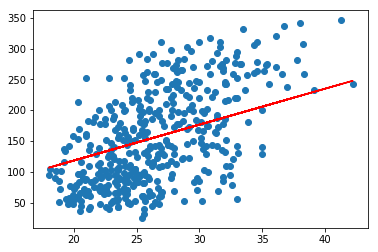

In [5]:
# 绘制结果
y_pred = theta[0] + theta[1] * x[:, 1]
plt.figure()
# 绘制样本点
plt.scatter(x[:, 1], y)

# 绘制拟合线
plt.plot(x[:, 1], y_pred, c='red')
plt.show()

## 4.自己写一个gradient_descent(向量化)

Initial Loss: 11366.407493557621
iter1Loss: 2878.6367927857673
iter2Loss: 2194.668304736849
iter3Loss: 2139.543483527391
iter4Loss: 2135.091955956442
iter5Loss: 2134.7237691608857
iter6Loss: 2134.6846254312354
iter7Loss: 2134.6719970672784
iter8Loss: 2134.6615058719262
iter9Loss: 2134.651187408531
iter10Loss: 2134.6408833794158
iter11Loss: 2134.630581028657
iter12Loss: 2134.6202793283323
iter13Loss: 2134.609978195582
iter14Loss: 2134.5996776237
iter15Loss: 2134.5893776121184
iter16Loss: 2134.5790781607643
iter17Loss: 2134.5687792696035
iter18Loss: 2134.5584809386046
iter19Loss: 2134.5481831677375
iter20Loss: 2134.5378859569714
iter21Loss: 2134.527589306277
iter22Loss: 2134.5172932156224
iter23Loss: 2134.5069976849777
iter24Loss: 2134.4967027143125
iter25Loss: 2134.4864083035964
iter26Loss: 2134.4761144527984
iter27Loss: 2134.4658211618894
iter28Loss: 2134.455528430837
iter29Loss: 2134.4452362596126
iter30Loss: 2134.4349446481847
iter31Loss: 2134.424653596523
iter32Loss: 2134.4143631045

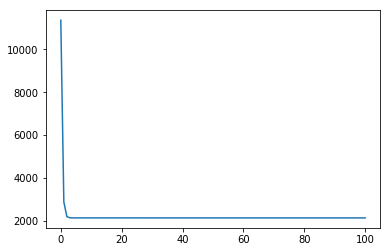

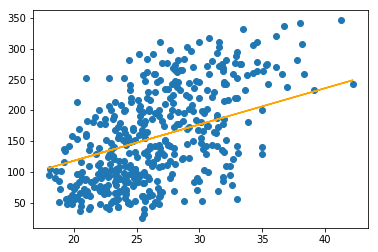

In [44]:
data = pd.read_csv('diabetes.csv')
x = np.array(data['BMI']).reshape(-1,1)
y = np.array(data['Y']).reshape(-1,1)
x = np.hstack([x,np.ones_like(x)]) #(n,f+1)
w = np.random.rand(x.shape[1],1) #(f+1,1)
max_iter = 100
### 演示：一次前传 ###
y_pred = x.dot(w)
loss_init = np.sum(np.power(y_pred-y,2)/(2*x.shape[0]))
print("Initial Loss:",loss_init)

### 计算梯度 ###
loss = list()
loss.append(loss_init)
for iter_time in range(max_iter):
    diff = np.repeat(x.dot(w)-y,x.shape[1],axis=1) #(n,f+1)
    d_w = diff*x #(n,f+1)
    d_w = (1/x.shape[0])*np.sum(d_w,axis=0).reshape(-1,1)
    w -= d_w*0.001
    y_pred = x.dot(w)
    iter_loss = np.sum(np.power(y_pred-y,2)/(2*x.shape[0]))
    print("iter{}Loss:".format(iter_time+1),iter_loss)
    loss.append(iter_loss)
### 画loss曲线和拟合结果 ###
plt.plot(np.arange(101),loss)
plt.show()

y_pred = x.dot(w)
plt.scatter(x[:,0],y)
plt.plot(x[:,0],y_pred,c="orange")
plt.show()